In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

In [4]:
df = pd.read_csv("subs.csv")
subs = dict([(label, smi) for label, smi in zip(df["label"], df["smiles"])])

In [5]:
catalysts = {}
core = Chem.MolFromSmiles("O[C@@H]([C@@]1([H])[N@+]2([H])C[C@H](CC)[C@@H](CC2)C1)C3=C4C(C=CC=C4)=NC=C3")
core = Chem.AddHs(core)
patt_O = Chem.MolFromSmarts(r"[$([H]O)]")
patt_N = Chem.MolFromSmarts(r"[$([H]N)]")
for label_O in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    smi = subs[label_O]
    cano_smi = Chem.MolToSmiles(Chem.MolFromSmiles(smi))
    repl = Chem.RWMol(Chem.MolFromSmiles(cano_smi))
    repl.RemoveAtom(0)
    Chem.SanitizeMol(repl)
    rms = Chem.ReplaceSubstructs(core, patt_N, repl)
    res = rms[0]
    for label_N in [1, 3, 4, 5, 6, 7, 12, 13]:
        smi = subs[label_N]
        cano_smi = Chem.MolToSmiles(Chem.MolFromSmiles(smi))
        repl = Chem.RWMol(Chem.MolFromSmiles(cano_smi))
        repl.RemoveAtom(0)
        Chem.SanitizeMol(repl)
        rms = Chem.ReplaceSubstructs(res, patt_O, repl)
        res = rms[0]
        catalysts[f'{label_N}_{label_O}'] = Chem.MolToSmiles(Chem.RemoveHs(res))

1_1


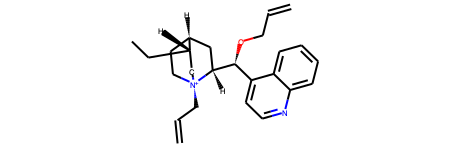

In [52]:
key = list(catalysts.keys())[0]
print(key)
smi = catalysts[key]
Chem.MolFromSmiles(smi)

In [82]:
c = pd.DataFrame({"smiles": list(catalysts.values()), "label": list(catalysts.keys())})
c.to_csv("catalysts.csv", index=None)